In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats
import pickle

In [7]:
df_national = pd.read_csv("./teamkim_datas.SNS_national_petition.csv")
df_national

,_id,NO,청원명,청원분야,청원종료일,동의기간,청원결과,동의수,청원인,청원의 취지,청원의 내용
0,65dbe6cfed704e19bc9880cd,1,극희귀질환 크라이오피린 연관 주기 증후군에 대한 치료제 키너렛주 아나킨라와 일라리스...,보건의료,2023-10-23T00:00:00.000Z,2023-09-22~2023-10-22,동의만료폐기,"8,059",진**,극희귀질환 크라이오피린 연관 주기(발열) 증후군 판정을 받고 치료중인 환자의 배우자...,저의 아내는 50세로 중학교 2학년 딸아이의 엄마입니다.\n원인을 알 수 없는 고열...
1,65dbe6cfed704e19bc9880ce,2,희귀질환치료제 일라리스의 보험급여 적용에 관한 청원,보건의료,2023-09-16T00:00:00.000Z,2023-08-16~2023-09-15,동의만료폐기,"5,745",이**,아이의 삶을 개선하고 일상적인 삶을 위해 급여항목으로 채택 되길 바라는 마음.,안녕하세요\n\n한 아이의 아버지입니다\n\n아이가 출생 후 얼굴 및 온 몸에 발진...
2,65dbe6cfed704e19bc9880cf,3,진성적혈구증가증 치료제 베스레미에 대한 건강 보험 급여화에 관한 청원,보건의료,2024-03-16T00:00:00.000Z,2024-02-14~2024-03-15,NaN,"45,387",김**,만성골수증식성 질환 환자들의 생명을 지킬 유일한 치료제 '베스레미'의 보험 급여화를...,"희귀성 난치 질환인 골수증식성 혈액암 (진성적혈구증가증, 본태성혈소판증가증, 골수섬..."
3,65dbe6cfed704e19bc9880d0,4,XLH저인산혈증구루병 치료제 크리스비타의 신속 사용 승인에 관한 청원,보건의료,2022-11-14T00:00:00.000Z,2022-10-17~2022-11-14,위원회 회부,"50,000",박순배,XLH 염색체 우성 저 인산 혈증은 인구 2-6만 명 당 1명에 발생하는 유전성 희...,"“엄마, 하루만이라도 아프지 않고 죽는 게 내 소원이야. 내가 이 말 하면 엄마가 ..."
4,65dbe6cfed704e19bc9880d1,5,"14만 파킨슨 환우를 죽음으로 내몰고 있는 대한민국 정부, 건강보험심사평가원의 무리...",보건의료,2023-05-18T00:00:00.000Z,2023-04-17~2023-05-17,동의만료폐기,796,김**,"대한민국정부의 무리한 약가 인하 정책으로 기존 복용중이던 약이 공급 중단됨에 따라,...",그 작디작은 알약 하나를 못 구해서 가족 중에 한 사람이 시름시름 앓는다고 상상해보...
5,65dbe6cfed704e19bc9880d2,6,수도권 전공의·전임의에 대한 업무개시명령 및 4대정책 전면 철회와 재난 및 안전관리...,재난/안전/환경,2020-10-02T00:00:00.000Z,2020-08-31~2020-10-01,동의만료폐기,"1,986",임**,일방적인 정책수립/진행을 멈추십시오. 중요한 정책일수록 '되짚어보고' '전문가'의 ...,기피지역과 기피과에서 진료를 '할 수 있도록' 하는 방안에 대해서 의협/대전협에서는...
6,65dbe6cfed704e19bc9880d3,7,EGFR 엑손 20 삽입 변이 비소세포폐암의 유일한 표적항암제의 건강보험 급여에 관...,보건의료,2024-02-26T00:00:00.000Z,2024-01-26~2024-02-25,NaN,"1,797",이**,EGFR 엑손 20 삽입 변이 비소세포폐암은 전체 폐암 중 1~3%를 차지하는 희귀...,"2023년 10월, 갑자기 어머니께서 회사에서 극심한 통증을 느끼고 쓰러져 응급실로..."
7,65dbe6cfed704e19bc9880d4,8,먹을 약이 없는 한국의 파킨슨 환자를 위한 치료제 보급 요청에 관한 청원,보건의료,2023-11-23T00:00:00.000Z,2023-10-23~2023-11-22,동의만료폐기,"1,383",최**,청원취지: 30년 특허가 풀린 복제약의 양성에 공급 중단되는 파킨슨병 오리지널...,한국의 파킨슨 환자들 먹을 약이 없다. \n\n1. 파킨슨병은 원인을 알 수 없는 ...
8,65dbe6cfed704e19bc9880d5,9,공급 중단된 파킨슨병 치료제 ‘마도파정’ 재공급에 관한 청원,보건의료,2023-09-17T00:00:00.000Z,2023-08-17~2023-09-16,동의만료폐기,"2,313",최**,"의료복지의 사각지대로 내몰리는 13만, 파킨슨병 환우들의 문제를 해결하고 공급 ...","1. 질병관리청 통계를 보면, 한국에는 2023년 기준 추정 약 13만 명의 파킨슨..."
9,65dbe6cfed704e19bc9880d6,10,다발골수종 엑스포비오 약제의 조속한 보험 급여 요청에 관한 청원,보건의료,2023-05-28T00:00:00.000Z,2023-04-27~2023-05-27,동의만료폐기,"2,804",백**,우리 환자에게 꼭 필요한 엑스포비오 약제가 눈 앞에 보이는 데도 불구 하고 보험 급...,안녕하세요. 저는 한국다발골수종환우회장 백민환입니다. 다발골수종은 몸에서 면역항체를...


청원명, 청원의 취지, 청원의 내용에서 모든 데이터를 합쳐 워드클라우드를 만들어보도록한다.

In [17]:
list_text = df_national["청원명"].to_list() + df_national["청원의 취지"].to_list() + df_national["청원의 내용"].to_list()
list_text

['극희귀질환 크라이오피린 연관 주기 증후군에 대한 치료제 키너렛주 아나킨라와 일라리스주 카나키누맙의 건강보험 급여항목 지정을 공개청원합니다.에 관한 청원',
 '희귀질환치료제 일라리스의 보험급여 적용에 관한 청원',
 '진성적혈구증가증 치료제 베스레미에 대한 건강 보험 급여화에 관한 청원',
 'XLH저인산혈증구루병 치료제 크리스비타의 신속 사용 승인에 관한 청원',
 '14만 파킨슨 환우를 죽음으로 내몰고 있는 대한민국 정부, 건강보험심사평가원의 무리한 약가 인하정책에 관한 청원',
 '수도권 전공의·전임의에 대한 업무개시명령 및 4대정책 전면 철회와 재난 및 안전관리 기본법 일부개정법률안 철회에 관한 청원',
 'EGFR 엑손 20 삽입 변이 비소세포폐암의 유일한 표적항암제의 건강보험 급여에 관한 청원',
 '먹을 약이 없는 한국의 파킨슨 환자를 위한 치료제 보급 요청에 관한 청원',
 '공급 중단된 파킨슨병 치료제 ‘마도파정’ 재공급에 관한 청원',
 '다발골수종 엑스포비오 약제의 조속한 보험 급여 요청에 관한 청원',
 '백신 부작용 피해보상 특별법 제정 촉구에 관한 청원',
 '모야모야병 환자 아이들의 학교 수업 개선에 관한 청원',
 '극희귀질환 크라이오피린 연관 주기(발열) 증후군 판정을 받고 치료중인 환자의 배우자입니다.\\n국내에 치료제가 두 가지 뿐인데 모두 비급여 항목으로 전액 본인부담입니다.\\n치료 과정도 막막한 상황인데 비용 부담이나마 덜 수 있도록 도와주세요.',
 '아이의 삶을 개선하고 일상적인 삶을 위해 급여항목으로 채택 되길 바라는 마음.',
 "만성골수증식성 질환 환자들의 생명을 지킬 유일한 치료제 '베스레미'의 보험 급여화를 청원합니다.\\n'진성적혈구증가증'이라는 만성골수증식성 질환은 희귀하지만 치명적인 혈액암의 일종입니다.\\n현재 사용 가능한 유일한 치료제는 '베스레미'입니다. \\n하지만 한달에 약 400만원이라는 비용 부담으로 인해 대부분의 환자들이 치료를 받지 못하고 있습니다.\\n이는 환자들에게 두 번의 고통을

In [18]:
text = ' '.join(list_text)
text

'극희귀질환 크라이오피린 연관 주기 증후군에 대한 치료제 키너렛주 아나킨라와 일라리스주 카나키누맙의 건강보험 급여항목 지정을 공개청원합니다.에 관한 청원 희귀질환치료제 일라리스의 보험급여 적용에 관한 청원 진성적혈구증가증 치료제 베스레미에 대한 건강 보험 급여화에 관한 청원 XLH저인산혈증구루병 치료제 크리스비타의 신속 사용 승인에 관한 청원 14만 파킨슨 환우를 죽음으로 내몰고 있는 대한민국 정부, 건강보험심사평가원의 무리한 약가 인하정책에 관한 청원 수도권 전공의·전임의에 대한 업무개시명령 및 4대정책 전면 철회와 재난 및 안전관리 기본법 일부개정법률안 철회에 관한 청원 EGFR 엑손 20 삽입 변이 비소세포폐암의 유일한 표적항암제의 건강보험 급여에 관한 청원 먹을 약이 없는 한국의 파킨슨 환자를 위한 치료제 보급 요청에 관한 청원 공급 중단된 파킨슨병 치료제 ‘마도파정’ 재공급에 관한 청원 다발골수종 엑스포비오 약제의 조속한 보험 급여 요청에 관한 청원 백신 부작용 피해보상 특별법 제정 촉구에 관한 청원 모야모야병 환자 아이들의 학교 수업 개선에 관한 청원 극희귀질환 크라이오피린 연관 주기(발열) 증후군 판정을 받고 치료중인 환자의 배우자입니다.\\n국내에 치료제가 두 가지 뿐인데 모두 비급여 항목으로 전액 본인부담입니다.\\n치료 과정도 막막한 상황인데 비용 부담이나마 덜 수 있도록 도와주세요. 아이의 삶을 개선하고 일상적인 삶을 위해 급여항목으로 채택 되길 바라는 마음. 만성골수증식성 질환 환자들의 생명을 지킬 유일한 치료제 \'베스레미\'의 보험 급여화를 청원합니다.\\n\'진성적혈구증가증\'이라는 만성골수증식성 질환은 희귀하지만 치명적인 혈액암의 일종입니다.\\n현재 사용 가능한 유일한 치료제는 \'베스레미\'입니다. \\n하지만 한달에 약 400만원이라는 비용 부담으로 인해 대부분의 환자들이 치료를 받지 못하고 있습니다.\\n이는 환자들에게 두 번의 고통을 주는 일입니다!\\n완치 될 수 없는 병이 생겼다는 절망의 고통과, 신약이 개발되었지만 치

In [19]:
text_split = text.split()
text_split

['극희귀질환',
 '크라이오피린',
 '연관',
 '주기',
 '증후군에',
 '대한',
 '치료제',
 '키너렛주',
 '아나킨라와',
 '일라리스주',
 '카나키누맙의',
 '건강보험',
 '급여항목',
 '지정을',
 '공개청원합니다.에',
 '관한',
 '청원',
 '희귀질환치료제',
 '일라리스의',
 '보험급여',
 '적용에',
 '관한',
 '청원',
 '진성적혈구증가증',
 '치료제',
 '베스레미에',
 '대한',
 '건강',
 '보험',
 '급여화에',
 '관한',
 '청원',
 'XLH저인산혈증구루병',
 '치료제',
 '크리스비타의',
 '신속',
 '사용',
 '승인에',
 '관한',
 '청원',
 '14만',
 '파킨슨',
 '환우를',
 '죽음으로',
 '내몰고',
 '있는',
 '대한민국',
 '정부,',
 '건강보험심사평가원의',
 '무리한',
 '약가',
 '인하정책에',
 '관한',
 '청원',
 '수도권',
 '전공의·전임의에',
 '대한',
 '업무개시명령',
 '및',
 '4대정책',
 '전면',
 '철회와',
 '재난',
 '및',
 '안전관리',
 '기본법',
 '일부개정법률안',
 '철회에',
 '관한',
 '청원',
 'EGFR',
 '엑손',
 '20',
 '삽입',
 '변이',
 '비소세포폐암의',
 '유일한',
 '표적항암제의',
 '건강보험',
 '급여에',
 '관한',
 '청원',
 '먹을',
 '약이',
 '없는',
 '한국의',
 '파킨슨',
 '환자를',
 '위한',
 '치료제',
 '보급',
 '요청에',
 '관한',
 '청원',
 '공급',
 '중단된',
 '파킨슨병',
 '치료제',
 '‘마도파정’',
 '재공급에',
 '관한',
 '청원',
 '다발골수종',
 '엑스포비오',
 '약제의',
 '조속한',
 '보험',
 '급여',
 '요청에',
 '관한',
 '청원',
 '백신',
 '부작용',
 '피해보상',
 '특별법',
 '제정',
 '촉구에',
 '관한',
 '청원',
 '모야모야병',

In [20]:
from collections import Counter
Counter(text_split)

Counter({'수': 52,
         '있는': 30,
         '있습니다.': 30,
         '한': 19,
         '파킨슨': 17,
         '치료를': 17,
         '없는': 16,
         '약': 15,
         '하는': 15,
         '청원': 13,
         '공급': 13,
         '환자들은': 13,
         '오리지널': 13,
         '관한': 12,
         '및': 12,
         '환자들이': 12,
         '그': 12,
         '치료제': 11,
         '위한': 11,
         '파킨슨병': 11,
         '기존': 11,
         '약을': 11,
         '보험': 10,
         '있도록': 10,
         '등': 10,
         '1회': 10,
         '대한': 9,
         '변이': 9,
         '환자들의': 9,
         '제대로': 9,
         '건강보험': 8,
         '약가': 8,
         '약이': 8,
         '백신': 8,
         '치료제가': 8,
         '위해': 8,
         '못하고': 8,
         '간곡히': 8,
         '심각한': 8,
         '더': 8,
         '하고': 8,
         '것은': 8,
         '이': 8,
         '합니다.': 8,
         '받고': 7,
         '환자의': 7,
         '삶을': 7,
         '치료제로': 7,
         '현재': 7,
         '등의': 7,
         ':': 7,
         '정부는': 7,
         '중요한': 

In [22]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 20.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud

In [24]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

In [25]:
wordcloud.words_

{'n': 1.0,
 '있습니다': 0.5441176470588235,
 '수': 0.25,
 '있는': 0.23529411764705882,
 '한': 0.23529411764705882,
 '약': 0.22058823529411764,
 '하는': 0.22058823529411764,
 '치료를': 0.20588235294117646,
 '오리지널': 0.20588235294117646,
 '공급': 0.19117647058823528,
 '마도파정': 0.19117647058823528,
 '등': 0.19117647058823528,
 '환자들은': 0.19117647058823528,
 '있습니다 n': 0.19117647058823528,
 '치료제': 0.17647058823529413,
 '및': 0.17647058823529413,
 '환자들이': 0.17647058823529413,
 '그': 0.17647058823529413,
 '관한 청원': 0.17647058823529413,
 '파킨슨': 0.16176470588235295,
 '위한': 0.16176470588235295,
 '파킨슨병': 0.16176470588235295,
 '기존': 0.16176470588235295,
 '약을': 0.16176470588235295,
 '합니다': 0.16176470588235295,
 '이': 0.16176470588235295,
 '없는': 0.14705882352941177,
 '위해': 0.14705882352941177,
 '대한': 0.1323529411764706,
 '환자들의': 0.1323529411764706,
 '하고': 0.1323529411764706,
 '를': 0.1323529411764706,
 '제대로': 0.1323529411764706,
 '합니다 n': 0.1323529411764706,
 '건강보험': 0.11764705882352941,
 '약이': 0.11764705882352941,
 '치료제가':

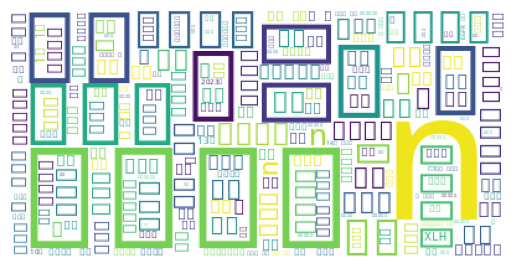

In [26]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off") #x,y축 범례를 없애줌
plt.show()